In [6]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from gala.units import galactic

import jax
jax.config.update('jax_enable_x64', True)
import jax.numpy as jnp

from empaf.label_model import VerticalLabelModel

In [4]:
tbl = at.QTable()
tbl['z'] = np.load('../test/ztest.npy') * u.kpc
tbl['vz'] = np.load('../test/vztest.npy') * u.kpc / u.Gyr
tbl['label'] = np.load('../test/mgtest.npy')

In [26]:
init_model = VerticalLabelModel(
    label_knots=jnp.linspace(0, np.sqrt(1.5), 9)**2,
    e_knots={
        2: jnp.array([0., 1.]),
        4: jnp.array([0., 1.]),
        # 6: jnp.array([0., 1.]),
    },
    unit_sys=galactic
)

In [42]:
model0 = init_model.copy()
model0.set_state({
    "Omega": 0.057,
    "z0": 0.,
    "vz0": 0.
})

In [43]:
rzp, thp = model0.z_vz_to_rz_theta_prime(data_H['z'], data_H['vz'])

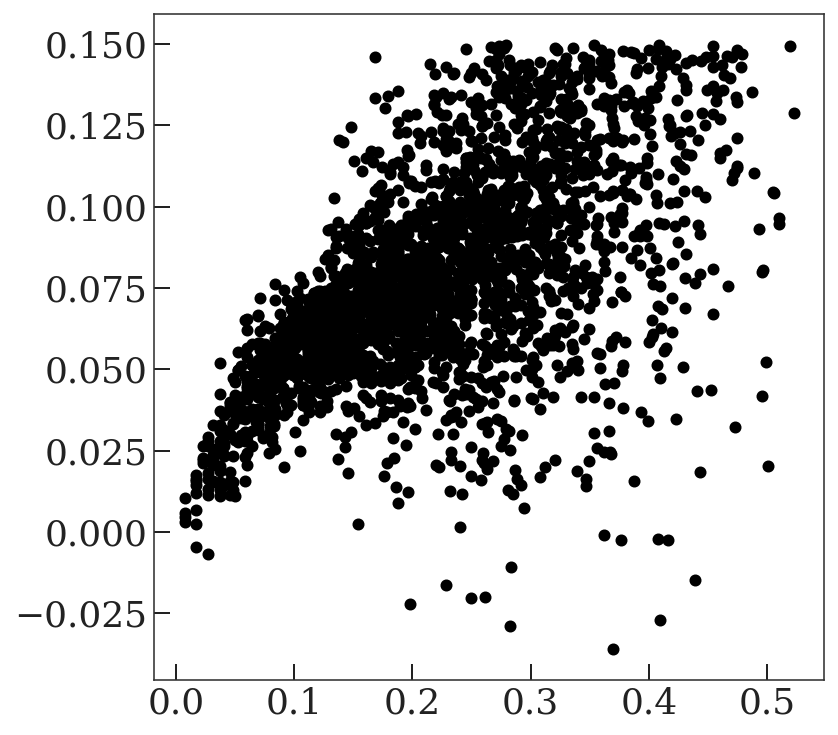

In [46]:
plt.scatter(
    rzp.ravel(), data_H['label_stat'].ravel()
)

In [16]:
im_bins = {'z': np.linspace(-2, 2, 91)}
im_bins['vz'] = im_bins['z'] * Omega0
data_H = init_model.get_data_im(tbl['z'], tbl['vz'], tbl['label'], im_bins)

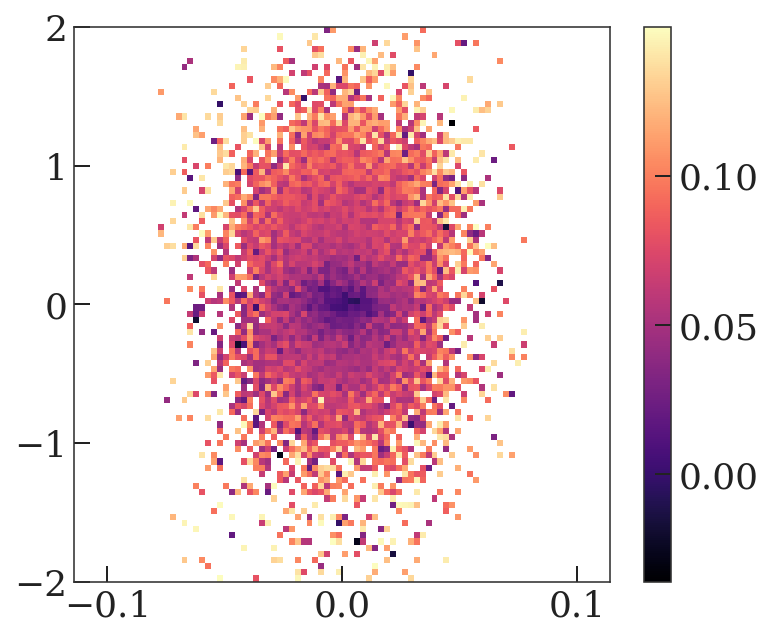

In [45]:
plt.figure(figsize=(6, 5))
plt.pcolormesh(
    data_H['vz'],
    data_H['z'],
    data_H['label_stat']
)
plt.colorbar()

In [ ]:
model0.set_state(params={
    "label_vals": 
    "e_vals": {
        2: np.array([0., 0.1]),
        4: np.array([0., -0.05])
    }
})